# Content based recommender system Anime 

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [43]:
df = pd.read_csv("anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [53]:
df.shape

(12294, 7)

### Data Pre processing 

In [54]:
df.isnull().sum() # searching if any missing value , it is present

anime_id     0
name         0
genre       62
type        25
episodes     0
rating       0
members      0
dtype: int64

In [55]:
#checking for rating null 0.0 value 
df.loc[df['rating'].isnull(), 'rating'] = 0.0
df['rating'].isnull().any()

False

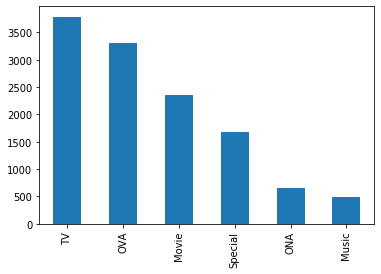

In [56]:
df['type'].value_counts().plot.bar()

In [57]:
df['name'].value_counts()

Shi Wan Ge Leng Xiaohua                                                    2
Saru Kani Gassen                                                           2
Nido to Mezamenu Komori Uta                                                1
To Heart 2: Dungeon Travelers                                              1
Gakken ka Nani ka no Mukashi no Video                                      1
                                                                          ..
Duel Masters Victory                                                       1
Gambo                                                                      1
Seto no Hanayome Picture Drama                                             1
BAR Kiraware Yasai                                                         1
Mahou no Princess Minky Momo: Hitomi no Seiza - Minky Momo Song Special    1
Name: name, Length: 12292, dtype: int64

### Some of the episodes are unkown type and missing is null datas are there 

In [58]:
df.loc[(df['episodes']=="Unknown") & (df['type'].isnull())].head()

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,0.0,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,0.0,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,0.0,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,0.0,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,0.0,8666


In [59]:
missing = df.loc[(df['episodes']=="Unknown") & (df['type'].isnull())].copy()
missing.shape

(25, 7)

In [60]:
missing.head(25)

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,0.0,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,0.0,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,0.0,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,0.0,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,0.0,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,Unknown,0.0,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,Unknown,0.0,4017
10983,34332,Flying Babies,NaN,NaN,Unknown,0.0,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,Unknown,0.0,1045
10990,34485,Ganko-chan,NaN,NaN,Unknown,0.0,11


In [61]:
df.loc[(df['name'] == "Steins;Gate 0"), 'type'] = 'TV'
df.loc[(df['name'] == "Steins;Gate 0"), 'episodes'] = '23'
df.loc[(df['name'] == "Violet Evergarden"), 'type'] = 'TV'
df.loc[(df['name'] == "Violet Evergarden"), 'episodes'] = '13'
df.loc[(df['name'] == "Code Geass: Fukkatsu no Lelouch"), 'type'] = 'TV'
df.loc[(df['name'] == "Code Geass: Fukkatsu no Lelouch"), 'episodes'] = '25'
df.loc[(df['name'] == "K: Seven Stories"), 'type'] = 'Movie'
df.loc[(df['name'] == "K: Seven Stories"), 'episodes'] = '6'
df.loc[(df['name'] == "Free! (Shinsaku)"), 'type'] = 'TV'
df.loc[(df['name'] == "Free! (Shinsaku)"), 'episodes'] = '12'
df.loc[(df['name'] == "Busou Shoujo Machiavellianism"), 'type'] = 'TV'
df.loc[(df['name'] == "Busou Shoujo Machiavellianism"), 'episodes'] = '12'
df.loc[(df['name'] == "Code:Realize: Sousei no Himegimi"), 'type'] = 'TV'
df.loc[(df['name'] == "Code:Realize: Sousei no Himegimi"), 'episodes'] = '12'
df.loc[(df['name'] == "Gamers!"), 'type'] = 'TV'
df.loc[(df['name'] == "Gamers!"), 'episodes'] = '12'
df.loc[(df['name'] == "Ganko-chan"), 'type'] = 'TV'
df.loc[(df['name'] == "Ganko-chan"), 'episodes'] = '10'
df.loc[(df['name'] == "Ginga Eiyuu Densetsu (2017)"), 'type'] = 'OVA'
df.loc[(df['name'] == "Ginga Eiyuu Densetsu (2017)"), 'episodes'] = '110'
df.loc[(df['name'] == "Grancrest Senki"), 'type'] = 'TV'
df.loc[(df['name'] == "Grancrest Senki"), 'episodes'] = '24'
df.loc[(df['name'] == "IDOLiSH7"), 'type'] = 'TV'
df.loc[(df['name'] == "IDOLiSH7"), 'episodes'] = '17'
df.loc[(df['name'] == "Isekai Shokudou"), 'type'] = 'TV'
df.loc[(df['name'] == "Isekai Shokudou"), 'episodes'] = '12'
df.loc[(df['name'] == "Oushitsu Kyoushi Haine"), 'type'] = 'TV'
df.loc[(df['name'] == "Oushitsu Kyoushi Haine"), 'episodes'] = '12'
df.loc[(df['name'] == "Peace Maker Kurogane (Shinsaku)"), 'type'] = 'TV'
df.loc[(df['name'] == "Peace Maker Kurogane (Shinsaku)"), 'episodes'] = '24'
df.loc[(df['name'] == "Seikaisuru Kado"), 'type'] = 'TV'
df.loc[(df['name'] == "Seikaisuru Kado"), 'episodes'] = '12'
df.loc[(df['name'] == "UQ Holder!"), 'type'] = 'TV'
df.loc[(df['name'] == "UQ Holder!"), 'episodes'] = '12'
df.loc[(df['name'] == "Citrus"), 'type'] = 'TV'
df.loc[(df['name'] == "Citrus"), 'episodes'] = '12'
df.loc[(df['name'] == "Hitorijime My Hero"), 'type'] = 'TV'
df.loc[(df['name'] == "Hitorijime My Hero"), 'episodes'] = '12'

In [62]:
df.isnull().sum()

anime_id     0
name         0
genre       62
type         6
episodes     0
rating       0
members      0
dtype: int64

In [63]:
df.dropna(subset=['type'], inplace=True)
df.shape

(12288, 7)

In [64]:
df.isnull().sum()

anime_id     0
name         0
genre       61
type         0
episodes     0
rating       0
members      0
dtype: int64

In [65]:
df[df['genre'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,TV,12,0.00,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,0.00,51
11097,34474,Tsukipro The Animation,NaN,TV,Unknown,0.00,843
11112,33035,Yuyushiki Special,NaN,Special,1,0.00,2294


In [66]:
df['genre'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id    False
name        False
genre       False
type        False
episodes    False
rating      False
members     False
dtype: bool

In [67]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [68]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

# Calculate Weighted Rating

In [69]:
m = df.members.quantile(0.75)
C = df.rating.mean()
print(m, C)

9448.5 6.355887858072929


In [70]:
def weighted_rating(df, m, C):
    term = df['members'] / (m + df['members'])
    return df['rating'] * term + (1-term) * C

In [71]:
df['community_rating'] = df.apply(weighted_rating, axis=1, args=(m,C))
df.head()

,anime_id,name,genre,type,episodes,rating,members,community_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9.234437
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.225834
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9.028960
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.131071
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,8.995145


In [72]:
df.drop(['anime_id', 'rating', 'members', 'episodes'], axis=1, inplace=True)
df.head()

,name,genre,type,community_rating
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.234437
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.225834
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.028960
3,Steins;Gate,"Sci-Fi, Thriller",TV,9.131071
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.995145


In [73]:
df = pd.concat([df, df['type'].str.get_dummies(), df['genre'].str.get_dummies(sep=',')], axis=1)
df.head()

,name,genre,type,community_rating,Movie,Music,ONA,OVA,Special,TV,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.234437,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.225834,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.028960,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,"Sci-Fi, Thriller",TV,9.131071,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.995145,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
anime_features = df.loc[:, "Movie":].copy()
anime_features.head()

,Movie,Music,ONA,OVA,Special,TV,Adventure,Cars,Comedy,Dementia,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
cosine_sim = cosine_similarity(anime_features.values, anime_features.values)

In [76]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31622777],
       [0.        , 1.        , 0.375     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.375     , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.31622777, 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [77]:
cosine_sim.shape

(12288, 12288)

In [78]:
anime_index = pd.Series(df.index, index=df.name).drop_duplicates()

In [79]:
def get_recommendation(anime_name, similarity=cosine_sim):
    idx = anime_index[anime_name]
    
    # Get the pairwsie similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar anime
    sim_scores = sim_scores[0:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime
    result = df[['name', 'genre', 'community_rating']].iloc[anime_indices].drop(idx)
    return result

In [80]:
get_recommendation("Steins;Gate")

,name,genre,community_rating
10898,Steins;Gate 0,"Sci-Fi, Thriller",0.852459
3581,Fireball Charming,Sci-Fi,6.574226
7984,Hanoka,Sci-Fi,6.040040
8910,Hoshi no Ko Poron,Sci-Fi,6.360831
10079,RoboDz,Sci-Fi,6.338184
10858,Yuusei Kamen,Sci-Fi,6.356795
10975,Escha Chron,Sci-Fi,5.861462
59,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,"Sci-Fi, Thriller",8.504498
126,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Thriller",8.342360
196,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Sci-Fi, Thriller",7.946121


In [81]:
get_recommendation("Kimi no Na wa.")

,name,genre,community_rating
208,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",8.051436
1494,Harmonie,"Drama, School, Supernatural",7.234142
1959,Air Movie,"Drama, Romance, Supernatural",7.207802
60,Hotarubi no Mori e,"Drama, Romance, Shoujo, Supernatural",8.507055
1199,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",7.391296
2103,Clannad Movie,"Drama, Fantasy, Romance, School",7.263791
5796,Taifuu no Noruda,"Drama, School, Sci-Fi, Supernatural",6.352344
5805,Wind: A Breath of Heart OVA,"Drama, Romance, School, Supernatural",6.354841
6394,Wind: A Breath of Heart (TV),"Drama, Romance, School, Supernatural",6.258412
894,Momo e no Tegami,"Drama, Supernatural",7.443333


In [82]:
get_recommendation("Kimi no Na wa.")

,name,genre,community_rating
208,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",8.051436
1494,Harmonie,"Drama, School, Supernatural",7.234142
1959,Air Movie,"Drama, Romance, Supernatural",7.207802
60,Hotarubi no Mori e,"Drama, Romance, Shoujo, Supernatural",8.507055
1199,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",7.391296
2103,Clannad Movie,"Drama, Fantasy, Romance, School",7.263791
5796,Taifuu no Noruda,"Drama, School, Sci-Fi, Supernatural",6.352344
5805,Wind: A Breath of Heart OVA,"Drama, Romance, School, Supernatural",6.354841
6394,Wind: A Breath of Heart (TV),"Drama, Romance, School, Supernatural",6.258412
894,Momo e no Tegami,"Drama, Supernatural",7.443333


In [83]:
get_recommendation("RoboDz")

,name,genre,community_rating
3581,Fireball Charming,Sci-Fi,6.574226
7984,Hanoka,Sci-Fi,6.040040
8910,Hoshi no Ko Poron,Sci-Fi,6.360831
10858,Yuusei Kamen,Sci-Fi,6.356795
10975,Escha Chron,Sci-Fi,5.861462
3,Steins;Gate,"Sci-Fi, Thriller",9.131071
2143,Figure 17: Tsubasa &amp; Hikaru,"Sci-Fi, Slice of Life",6.769844
2528,Mouretsu Pirates,"Sci-Fi, Space",7.095208
4395,Element Hunters,"Sci-Fi, Shounen",6.539583
4519,Bomberman B-Daman Bakugaiden V,"Sci-Fi, Shounen",6.386784


In [84]:
get_recommendation("Plastic Memories")

,name,genre,community_rating
4084,Ray The Animation,"Drama, Romance, Sci-Fi",6.560607
6366,Seraphim Call,"Drama, Romance, Sci-Fi",6.313714
2279,Saishuu Heiki Kanojo,"Drama, Romance, School, Sci-Fi",7.176445
4002,Ushinawareta Mirai wo Motomete,"Drama, Romance, School, Sci-Fi",6.751428
11079,Shuumatsu Nani Shitemasu ka? Isogashii desu ka...,"Drama, Fantasy, Romance, Sci-Fi",6.191413
1122,Kiznaiver,"Drama, Sci-Fi",7.610122
1548,Winter Sonata,"Drama, Romance",7.036514
5731,Sister Princess: Re Pure,"Drama, Romance",6.361245
11014,Island,"Drama, Sci-Fi",5.406582
168,Planetes,"Drama, Romance, Sci-Fi, Seinen, Space",8.212960
